# **Bibliotecas**

In [1]:
###################################################################################################
#  Bibliotecas gerais
#  Instalação

#!pip install xlrd

In [2]:
###################################################################################################
#  Bibliotecas gerais
#  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from numpy.linalg import matrix_rank

In [3]:
###################################################################################################
#  Bibliotecas gráfica
#  Instalação

#!pip install -U plotly
# !pip install plotly==4.8.1

# organização da planilha excel

#!pip install nltk

# Exportando figuras com melhores resoluções

#!pip install -U kaleido

#!add-apt-repository -y ppa:cran/poppler
#!apt-get update
#!apt-get install -y libpoppler-cpp-dev
#!apt-get install poppler-utils

In [4]:
###################################################################################################
#  Bibliotecas gráfica
# 
# 

import plotly.express as px
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Diretório de imagens
import os
if not os.path.exists("images"):
    os.mkdir("images")


## **Controle**

In [5]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# Instalação

#!git clone https://github.com/python-control/python-control.git

#!pip install slycot   # optional
#!pip install control



In [6]:
###################################################################################################
# Biblioteca de controle e sistemas dinâmicos
# 

import control
from control import impulse_response, step_response


# **Funções proprietárias**

In [7]:
def graphics_plot(x, y, y_name, yaxes_title, title='Title', bins=1, x_tick=1, save=False):

  '''
  y = [y1, y2, y3, y4]

  y_name = ['y1 name', 'y2 name', 'y3 name', 'y4 name']

  bins = number of bins for x scale

  title = 'Title'

  yaxes_title = ['Title yaxes1', 'Title yaxes2', 'Title yaxes3', 'Title yaxes4']

  x_tick = dtick for axis x

  save = True -> save graphics as image (images/title.eps) 
  '''

  # Create figure with secondary y-axis
  fig = make_subplots(specs=[[{'secondary_y': True}]])

  # Markers
  markers = ['circle','star','diamond','x']

  # Lines
  dash = ['dash','dot','dashdot']

  for i, v in enumerate(y):
    
    if (len(yaxes_title) == 1) | (i < len(y) - 1):
      on = False
    else:
      on = True

    if i == 0:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2)),
          # line_shape='spline'),
          secondary_y=False)
      
    else:
      # Add traces
      fig.add_trace(
          go.Scatter(x=x,
          y=v, name=y_name[i],
          marker_symbol=markers[i],
          marker_size=7,
          mode='lines+markers',
          line=dict(color='rgb(0, 0, 0)',
          width=2,dash=dash[i-1])),
          # line_shape='spline'),
          secondary_y=on)
  
  # Add figure title
  fig.update_layout(title_text=title)
  
  # Set x-axis title
  fig.update_xaxes(title_text='Ano relativo')

  # Set y-axes titles
  if len(yaxes_title) > 1:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)
    fig.update_yaxes(title_text='<b>'+ yaxes_title[1] +'</b>', secondary_y=True)
  else:
    fig.update_yaxes(title_text='<b>'+ yaxes_title[0] +'</b>', secondary_y=False)

  
  fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
  fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

  fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
  fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

  fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )

  fig.update_layout(
      xaxis=dict(
      tickmode='linear',
      tick0=0,
      dtick=x_tick
  ))

  fig.update_layout(legend=dict(
    orientation='h',
    yanchor='bottom',
    y=1.01,
    xanchor='right',
    x=0.95
  ))

  fig.show()

  if save:
    fig.write_image('images/'+title+'.eps')

## **Geração de elipses para o resultado do GMM**

In [8]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
   
    ax = ax or plt.gca()
    
    # Rotaciona o conjunto de dados para alinhamento com a convariância
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Cria e elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

# **Dados**

In [31]:
###################################################################################################
# Lendo os dados

vogais = pd.read_csv("vogais1.csv")
vogais.head()

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3
0,1,1,1,1,111.43,635.40,1099.2,2604.3
1,1,1,2,1,118.49,607.86,1067.4,2588.8
2,1,1,3,1,119.31,637.90,1163.5,2553.4
3,1,1,4,1,119.29,584.08,1183.2,2499.3
4,1,1,5,1,126.22,577.20,1142.2,2498.9


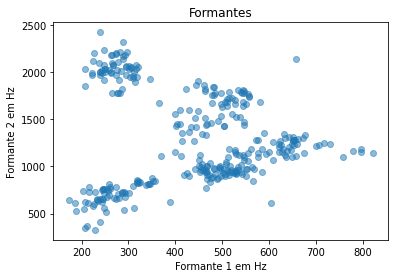

In [32]:
###################################################################################################
# Análise elementar dos dados

### Análise por genero

Homem   = vogais['Genero'] == 1
Mulher  = vogais['Genero'] == 2
Crianca = vogais['Genero'] == 3

vogais[Homem].describe()
vogais[Mulher].describe()
vogais[Crianca].describe()

### Separando os dataframes por genero

vogaisH = vogais[Homem]
vogaisM = vogais[Mulher]
vogaisC = vogais[Crianca]

### Capturando os tipos de fonemas

fonemas = vogais['Fonema'].unique()

### Analisando o espalhamento ntre os homens para o primeiro fonema

formante1 = np.array(vogais['f1'][Homem])
formante2 = np.array(vogais['f2'][Homem])

### Gráficamente

plt.scatter(formante1, formante2, alpha=0.5)
plt.title('Formantes')
plt.xlabel('Formante 1 em Hz')
plt.ylabel('Formante 2 em Hz')
plt.show()

In [33]:
###################################################################################################
# Codifica os fonemas
# !pip install sklearn
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
vogais["Codigo"] = ord_enc.fit_transform(vogais[["Fonema"]])

In [34]:
###################################################################################################
# Visualiza os dados

import plotly.express as px
df = vogaisH
plt.figure(figsize=(15,7))
fig = px.scatter(df, x="f1", y="f2", color="Fonema")

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='black')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

fig.update_layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
fig.show()

<Figure size 1080x504 with 0 Axes>

# **Separando os fonemas**

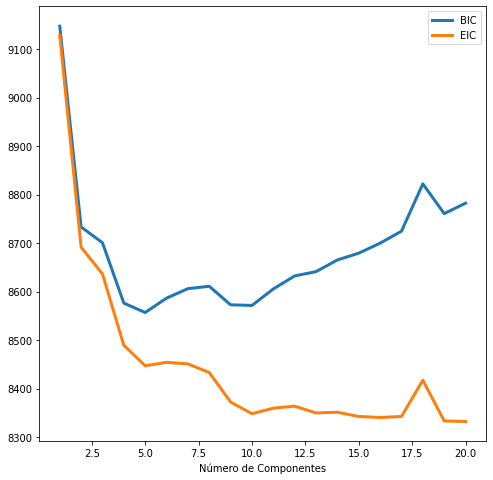

In [35]:
Freq = np.array([formante1,formante2]).T

###################################################################################################
# Gaussian Mixtures

from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Freq)
          for n in n_components]
plt.figure(figsize = (8,8))
plt.plot(n_components, [m.bic(Freq) for m in models], label='BIC',linewidth = "3")
plt.plot(n_components, [m.aic(Freq) for m in models], label='EIC',linewidth = "3")
plt.legend(loc='best')
plt.xlabel('Número de Componentes');

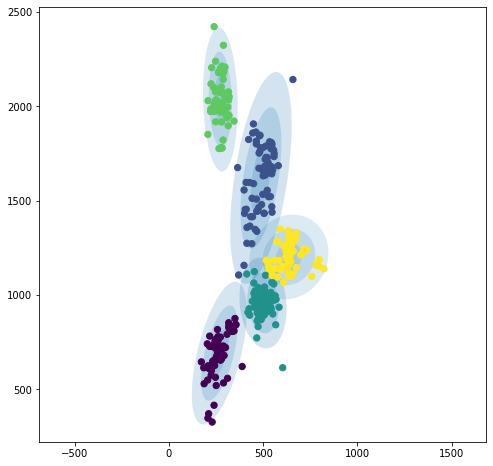

In [36]:
###################################################################################################
# Gaussian Mixtures - visualização

from matplotlib.patches import Ellipse

gmm2 = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
plt.figure(figsize = (8,8))
plot_gmm(gmm2, Freq)

In [37]:
gmm2.fit_predict(Freq, y=None)

array([4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 4, 4, 4, 4, 4, 1, 3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 4, 0, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 4, 2, 4, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4,
       4, 2, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 4, 4, 4, 2, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4,

In [38]:
vogais.head(8)

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
0,1,1,1,1,111.43,635.40,1099.2,2604.3,0.0
1,1,1,2,1,118.49,607.86,1067.4,2588.8,0.0
2,1,1,3,1,119.31,637.90,1163.5,2553.4,0.0
3,1,1,4,1,119.29,584.08,1183.2,2499.3,0.0
4,1,1,5,1,126.22,577.20,1142.2,2498.9,0.0
5,1,1,1,2,113.28,463.79,1801.0,2470.6,1.0
6,1,1,2,2,115.26,444.47,1858.8,2566.9,1.0
7,1,1,3,2,117.85,482.00,1759.6,2438.7,1.0


# Fazendo detecção de vogais
## separando o dataframe por genero e por vogais para calcular os intervalos válidos de f0, f1, f2 e f3

In [39]:
vogais['Fonema'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [40]:
vogais['Fonema'].replace(to_replace = 1,value= 'AA', inplace = True)
#vogais['Fonema'].replace(to_replace = '*AA',value= 'AA', inplace = True)
#vogais['Fonema'].replace(to_replace = '*AE',value= 'AA', inplace = True)
vogais['Fonema'].replace(to_replace = '*AH',value= 'AA', inplace = True)

#vogais['Fonema'].replace(to_replace = 'AE',value= 'AA', inplace = True)
vogais['Fonema'].replace(to_replace = 'AH',value= 'AA', inplace = True)



vogais['Fonema'].replace(to_replace = 2,value= 'EE', inplace = True)
vogais['Fonema'].replace(to_replace = '*EH',value= 'EE', inplace = True)
vogais['Fonema'].replace(to_replace = 'EH',value= 'EE', inplace = True)
#vogais['Fonema'].replace(to_replace = '*ER',value= 'EE', inplace = True)
#vogais['Fonema'].replace(to_replace = 'ER',value= 'EE', inplace = True)


vogais['Fonema'].replace(to_replace = 3,value= 'II', inplace = True)
vogais['Fonema'].replace(to_replace = 'IY',value= 'II', inplace = True)
#vogais['Fonema'].replace(to_replace = 'IH',value= 'II', inplace = True)
#vogais['Fonema'].replace(to_replace = '*IH',value= 'II', inplace = True)
vogais['Fonema'].replace(to_replace = '*IY',value= 'II', inplace = True)

vogais['Fonema'].replace(to_replace = 4,value= 'OO', inplace = True)
vogais['Fonema'].replace(to_replace = 'AO',value= 'OO', inplace = True)
vogais['Fonema'].replace(to_replace = '*AO',value= 'OO', inplace = True)

vogais['Fonema'].replace(to_replace = 5,value= 'UU', inplace = True)
#vogais['Fonema'].replace(to_replace = '*UH',value= 'UU', inplace = True)
vogais['Fonema'].replace(to_replace = '*UW',value= 'UU', inplace = True)
#vogais['Fonema'].replace(to_replace = 'UH',value= 'UU', inplace = True)
vogais['Fonema'].replace(to_replace = 'UW',value= 'UU', inplace = True)

In [41]:
vogais['Fonema'].unique()

array(['AA', 'EE', 'II', 'OO', 'UU'], dtype=object)

In [42]:
dfHomem = vogais.loc[vogais['Genero'] == 1]

# Intervalos formantes e f0  vogal A

In [43]:
# Separando dataframe para vogais com o fonema AA
dfHomemA = dfHomem.loc[dfHomem['Fonema'] == "AA"]
dfHomemA

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
0,1,1,1,AA,111.43,635.40,1099.2,2604.3,0.0
1,1,1,2,AA,118.49,607.86,1067.4,2588.8,0.0
2,1,1,3,AA,119.31,637.90,1163.5,2553.4,0.0
3,1,1,4,AA,119.29,584.08,1183.2,2499.3,0.0
4,1,1,5,AA,126.22,577.20,1142.2,2498.9,0.0
...,...,...,...,...,...,...,...,...,...
300,1,13,1,AA,108.10,625.41,1223.7,2519.9,0.0
301,1,13,2,AA,106.93,653.79,1231.5,2634.9,0.0
302,1,13,3,AA,106.10,648.88,1237.3,2596.3,0.0
303,1,13,4,AA,119.19,624.33,1267.3,2610.6,0.0


In [44]:
from scipy.io import savemat

media = dfHomemA.mean()
desvPad = dfHomemA.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesAmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesAmat

mdic = {"A": formantesAmat, "label": "experiment"}

savemat("matlab_matrixA.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\2260579539.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\2260579539.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal E

In [45]:
# Separando dataframe para vogais com o fonema EE
dfHomemE = dfHomem.loc[dfHomem['Fonema'] == "EE"]
dfHomemE

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
5,1,1,1,EE,113.28,463.79,1801.0,2470.6,1.0
6,1,1,2,EE,115.26,444.47,1858.8,2566.9,1.0
7,1,1,3,EE,117.85,482.00,1759.6,2438.7,1.0
8,1,1,4,EE,122.44,485.48,1780.1,2552.5,1.0
9,1,1,5,EE,127.74,510.71,1719.7,2475.5,1.0
...,...,...,...,...,...,...,...,...,...
305,1,13,1,EE,112.34,477.59,1672.3,2376.2,1.0
306,1,13,2,EE,124.06,506.87,1680.2,2505.6,1.0
307,1,13,3,EE,112.01,499.75,1632.1,2379.6,1.0
308,1,13,4,EE,129.05,511.38,1636.1,2673.5,1.0


In [46]:
media = dfHomemE.mean()
desvPad = dfHomemE.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesEmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesEmat

mdic = {"E": formantesEmat, "label": "experiment"}

savemat("matlab_matrixE.mat", mdic)
formantesEmat

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\499482407.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\499482407.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



[[82.78696706524244, 145.1154637039883],
 [363.5746974789365, 609.1893025210634],
 [1127.5898795021972, 2116.8953512670337],
 [1624.7082425296549, 3116.3729882395764]]

# Intervalos formantes e f0  vogal I

In [47]:
# Separando dataframe para vogais com o fonema II
dfHomemI = dfHomem.loc[dfHomem['Fonema'] == "II"]
dfHomemI

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
10,1,1,1,II,124.73,247.71,2239.1,3392.2,2.0
11,1,1,2,II,122.78,308.90,1939.4,2797.0,2.0
12,1,1,3,II,122.81,316.28,2076.6,2816.8,2.0
13,1,1,4,II,124.14,345.26,1922.0,2857.3,2.0
14,1,1,5,II,130.13,288.25,2143.1,2658.2,2.0
...,...,...,...,...,...,...,...,...,...
310,1,13,1,II,123.57,262.66,2001.8,2782.6,2.0
311,1,13,2,II,131.25,283.19,2009.4,2614.6,2.0
312,1,13,3,II,129.96,275.64,2019.0,2674.7,2.0
313,1,13,4,II,142.99,295.33,2054.1,2947.5,2.0


In [48]:
media = dfHomemI.mean()
desvPad = dfHomemI.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesImat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesImat

mdic = {"I": formantesImat, "label": "experiment"}

savemat("matlab_matrixI.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\4225988927.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\4225988927.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal O

In [49]:
# Separando dataframe para vogais com o fonema OO
dfHomemO = dfHomem.loc[dfHomem['Fonema'] == "OO"]
dfHomemO

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
15,1,1,1,OO,115.91,473.05,832.63,2791.1,3.0
16,1,1,2,OO,122.98,488.24,868.95,2535.6,3.0
17,1,1,3,OO,121.97,466.21,772.59,2546.1,3.0
18,1,1,4,OO,125.51,491.80,877.20,2588.9,3.0
19,1,1,5,OO,130.88,468.68,906.05,2525.0,3.0
...,...,...,...,...,...,...,...,...,...
315,1,13,1,OO,110.94,542.18,924.07,2414.6,3.0
316,1,13,2,OO,114.49,525.79,930.53,2433.7,3.0
317,1,13,3,OO,119.96,553.55,970.30,2393.5,3.0
318,1,13,4,OO,131.39,540.13,936.00,2588.6,3.0


In [50]:
media = dfHomemO.mean()
desvPad = dfHomemO.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesOmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesOmat

mdic = {"O": formantesOmat, "label": "experiment"}

savemat("matlab_matrixO.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\4261808303.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\4261808303.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# Intervalos formantes e f0  vogal U

In [51]:
# Separando dataframe para vogais com o fonema UU
dfHomemU = dfHomem.loc[dfHomem['Fonema'] == "UU"]
dfHomemU

,Genero,Locutor,Tentativa,Fonema,fo,f1,f2,f3,Codigo
20,1,1,1,UU,128.08,257.88,817.10,1845.9,4.0
21,1,1,2,UU,120.45,273.17,776.84,2300.8,4.0
22,1,1,3,UU,124.31,311.15,558.52,2282.9,4.0
23,1,1,4,UU,125.10,289.75,533.93,1741.7,4.0
24,1,1,5,UU,126.04,308.73,791.87,2346.8,4.0
...,...,...,...,...,...,...,...,...,...
320,1,13,1,UU,134.99,278.39,711.15,2168.6,4.0
321,1,13,2,UU,129.88,300.23,721.56,2361.7,4.0
322,1,13,3,UU,140.54,285.24,727.68,1834.5,4.0
323,1,13,4,UU,145.91,285.60,718.44,2389.8,4.0


In [52]:
media = dfHomemU.mean()
desvPad = dfHomemU.std()
mediaMais2Dp = media+2*desvPad
mediaMenos2Dp = media-2*desvPad
f0m = mediaMenos2Dp['fo']
f0M = mediaMais2Dp['fo']
f1m = mediaMenos2Dp['f1']
f1M = mediaMais2Dp['f1']
f2m = mediaMenos2Dp['f2']
f2M = mediaMais2Dp['f2']
f3m = mediaMenos2Dp['f3']
f3M = mediaMais2Dp['f3']
formantesUmat = [[f0m, f0M], [f1m,f1M], [f2m, f2M] , [f3m, f3M]]
formantesUmat

mdic = {"U": formantesUmat, "label": "experiment"}

savemat("matlab_matrixU.mat", mdic)

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\3642215726.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\STORM\AppData\Local\Temp\ipykernel_91324\3642215726.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



# **Referências**

https://www.fon.hum.uva.nl/praat/

https://rdrr.io/cran/phonTools/man/pb52.html#heading-3

http://my.ilstu.edu/~jsawyer/consonantsvowels3/consonantsvowels24.html